In [1]:
!pip3 install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn  import linear_model
from sklearn.metrics import r2_score

  Using cached https://files.pythonhosted.org/packages/2e/d0/860c4f6a7027e00acff373d9f5327f4ae3ed5872234b3cbdd7bcb52e5eff/scikit_learn-0.22-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/54/18/d7c101d5e93b6c78dc206fcdf7bd04c1f8138a7b1a93578158fa3b132b08/scipy-1.3.3-cp36-cp36m-manylinux1_x86_64.whl


In [2]:
ds = pd.read_csv('apple_dataset.csv')
ds.head(n=5)

,Volume,Weight
0,284,220.0
1,287,224.0
2,296,235.0
3,315,246.0
4,324,249.0


In [3]:
f_ds = ds[['Volume','Weight']] 
f_ds.head()


,Volume,Weight
0,284,220.0
1,287,224.0
2,296,235.0
3,315,246.0
4,324,249.0


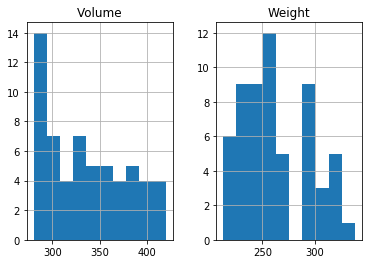

In [4]:
viz = f_ds
viz.hist()
plt.show()

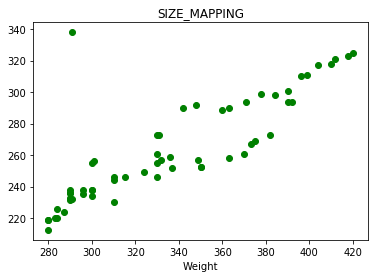

In [5]:

X = f_ds['Volume']
Y = f_ds['Weight']
plt.title("SIZE_MAPPING")
plt.scatter(X,Y,color='green')
plt.xlabel("Volume")
plt.xlabel("Weight")
plt.show()

In [6]:
msk = np.random.rand(len(ds)) < 0.8
train = f_ds[msk]
test = f_ds[~msk]

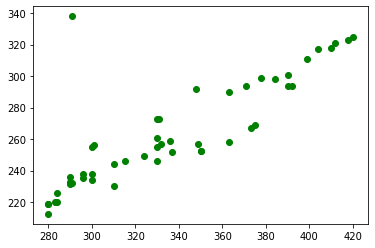

In [7]:
plt.scatter(train['Volume'],train['Weight'],color='green')
plt.show()

In [8]:
lin_model = linear_model.LinearRegression()
model_X = np.asanyarray(train[['Volume']])                        
model_Y = np.asanyarray(train[['Weight']])                        
lin_model.fit(model_X,model_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:

print("Co-efficient : ",lin_model.coef_)
print("Intercept    : ",lin_model.intercept_)


Co-efficient :  [[0.64332513]]
Intercept    :  [47.16466495]


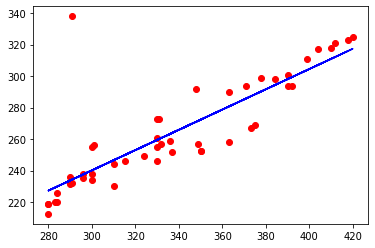

In [10]:

X=train['Volume']
Y=train['Weight']
plt.scatter(X,Y,color='red')
plt.plot(model_X,lin_model.coef_[0][0]*model_X + lin_model.intercept_[0],color='blue')
plt.show()

In [11]:
evalu_X = np.asanyarray(test[['Volume']])
evalu_Y = np.asanyarray(test[['Weight']])
evalu_answer = lin_model.predict(evalu_Y)
print(evalu_answer)

[[191.26949439]
 [198.98939597]
 [200.27604623]
 [200.27604623]
 [232.76396537]
 [205.42264728]
 [233.72895307]
 [215.07252426]
 [222.79242583]
 [246.5954557 ]]


In [12]:

Mean_absolute_error = np.mean(np.absolute(evalu_answer - evalu_Y))

print( "Mean_absolute_error  : %.2f "%(Mean_absolute_error) )

Residual_sum_of_squares = np.mean((evalu_answer - evalu_Y) ** 2)

print("Residual_sum_of_squares : %.2f " %(Residual_sum_of_squares) )

R2_score =r2_score(evalu_answer , evalu_X)

print("R2_score : %.2f " % (R2_score))


Mean_absolute_error  : 45.73 
Residual_sum_of_squares : 2185.70 
R2_score : -46.55 


In [13]:
lin_model.predict([[284]])

array([[229.86900228]])

In [23]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(lin_model, 'apple_size_reg_model.pkl') 


/home/yeswanth/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['apple_size_reg_model.pkl']